<a href="https://colab.research.google.com/github/Zain-mahfoud94/Java-Core-Tutorial/blob/main/06_Kernel_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Methods

### Table of Contents
1. [Setup](#setup)
2. [Dual Representation](#dual)
3. [Kernel Functions](#kernels)
4. [Hyperparameters of Kernels](#hyperparameters)

## 1. Setup <a class="anchor" id="setup"></a>

In [ ]:
import numpy as np
import pylab as plt
plt.style.use('ggplot')

In [ ]:
def get_data():
    np.random.seed(42)
    X = np.random.uniform(0, 1, 11)
    y = np.sin(2*np.pi*X)
    y += np.random.randn(*y.shape)*.2
    return X, y

X, y = get_data()

## 2. Dual Representation <a class="anchor" id="dual"></a>
Many linear parametric models can be re-cast into an equivalent *dual representation*.
In this form, the predictions are based on *linear combinations of a kernel function evaluated at the training data points*.
For a model that uses a fixed nonlinear feature space mapping (or basis functions) $\phi(\mathbf{x})$, the kernel function is given by
$$k(\mathbf{x},\mathbf{x}') = \phi(\mathbf{x})^{\mathrm{T}}\phi(\mathbf{x}')$$

The concept of a kernel formulated as an inner product in a feature space allows us to build interesting extensions of many well-known algorithms by making use of the *kernel trick*, also known as kernel substitution.

**Kernel Trick:** If we have an algorithm formulated in such a way that the input vector $\mathbf{x}$ enters only in the form of scalar products, then we can replace that scalar product with some other choice of kernel.

We consider a linear regression model whose parameters are determined by minimizing a regularized sum-of-squares error function given by:
$$J(\mathbf{w}) = \frac{1}{2} \sum\limits^N_{n=1}{\left\{ \mathbf{w}^{\textrm{T}} \boldsymbol{\phi} (\mathbf{x}_n) - t_n \right\} ^2 + \frac{ \lambda}{2}\mathbf{w}^{\textrm{T}}\mathbf{w}}$$
If we set the gradient of $J(\mathbf{w})$ with respect to $\mathbf{w}$ equal to zero, we see that the solution for $\mathbf{w}$ takes the form:
$$\mathbf{w}=-\frac{1}{\lambda}\sum\limits^N_{n=1}\left\{\mathbf{w}^{\textrm{T}} \boldsymbol{\phi}(\mathbf{x}_n) - t_n \right\} \boldsymbol{\phi}(\mathbf{x}_n).$$
Here we abbreviate
$$\mathbf{w}={-\frac{1}{\lambda}}\sum\limits^N_{n=1}\left\{{\mathbf{w}^{\textrm{T}} \boldsymbol{\phi}(\mathbf{x}_n) - t_n }\right\}\boldsymbol{\phi}(\mathbf{x}_n) = \sum\limits^N_{n=1} {a_n} \boldsymbol{\phi}(\mathbf{x}_n) = \boldsymbol{\Phi}^{\textrm{T}}\mathbf{a},$$
Inserting this into the original loss function $J(\mathbf{w})$ and defining the gram matrix $\mathbf{K} = \boldsymbol{\Phi} \boldsymbol{\Phi}^\mathrm{T}$, our model is in the form of the dual representation:
\begin{align}
y(\mathbf{x}) = {\mathbf{k}(\mathbf{x})}\big( \mathbf{K} + \lambda \mathbf{I} \big)^{-1} \mathbf{t}
\end{align}

- Implement a linear regression model which makes use of the dual representation.

In [ ]:
class LinearRegression:
    def __init__(self, kernel_func):
        self.kernel_func = kernel_func

    def fit(self, X, t, lmb=1e-5):
        self.X = X
        K = np.array([[self.kernel_func(x, y) for y in X] for x in X])
        self.a = np.linalg.solve(K + lmb*np.eye(len(K)), t)

    def predict(self, x):
        k = np.array([self.kernel_func(x, y) for y in X])
        pred = k @ self.a
        return pred

## 3. Kernel Functions <a class="anchor" id="kernels"></a>

In order to use this model, we need to define a kernel function. Implement the following kernel functions:
- **Linear Kernel**: $$k(\mathbf{x},\mathbf{x}') = \mathbf{x}^\mathrm{T}\mathbf{x}'$$
- **Gaussian Kernel**: $$k(\mathbf{x},\mathbf{x}') = \exp(- \|\mathbf{x} - \mathbf{x}'\|^2 / 2 \sigma^2)$$
- **Sigmoidal Kernel**: $$k(\mathbf{x},\mathbf{x} ^\prime) = \tanh(a\mathbf{x}^{\textrm{T}}\mathbf{x}^\prime +b)$$

In [ ]:
class LinearKernel:
    def __call__(self, x, y):
        return np.dot(x, y)

In [ ]:
class GaussianKernel:
    def __init__(self, sigma=1):
        self.sigma = sigma

    def __call__(self, x, y):
        x = np.array(x)
        y = np.array(y)
        return np.exp(- np.sum((x - y)**2) / 2*self.sigma**2)

In [ ]:
class SigmoidalKernel:
    def __init__(self, a=1, b=0):
        self.a = a
        self.b = b

    def __call__(self, x, y):
        return np.tanh(self.a * np.dot(x, y) + self.b)

## 4. Hyperparameters of Kernels <a class="anchor" id="hyperparameters"></a>
- Compare the different regression fits for different kernel functions with various hyperparameters.

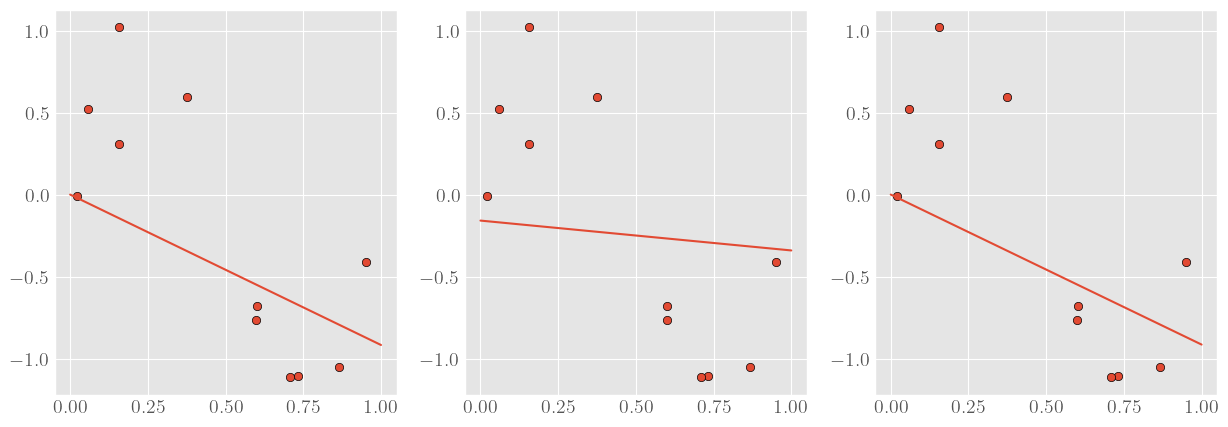

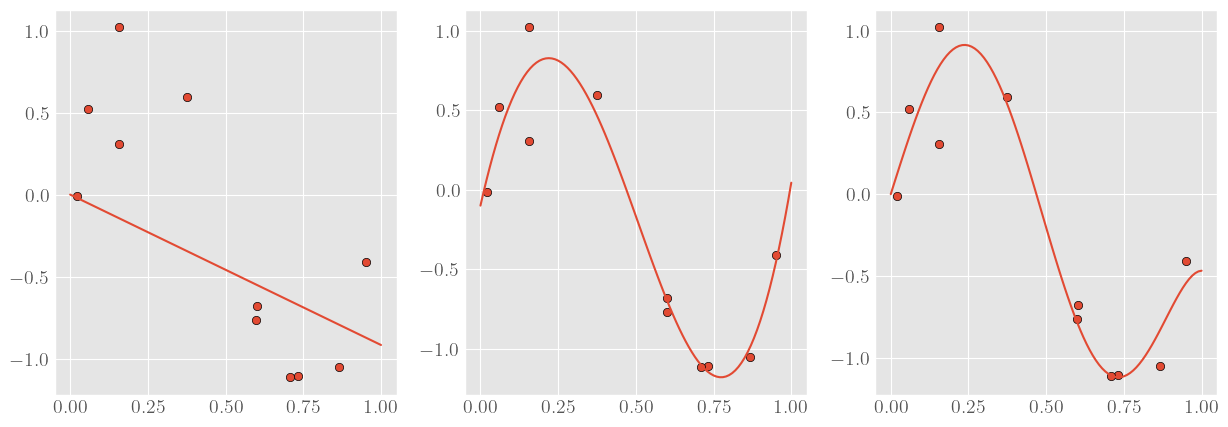

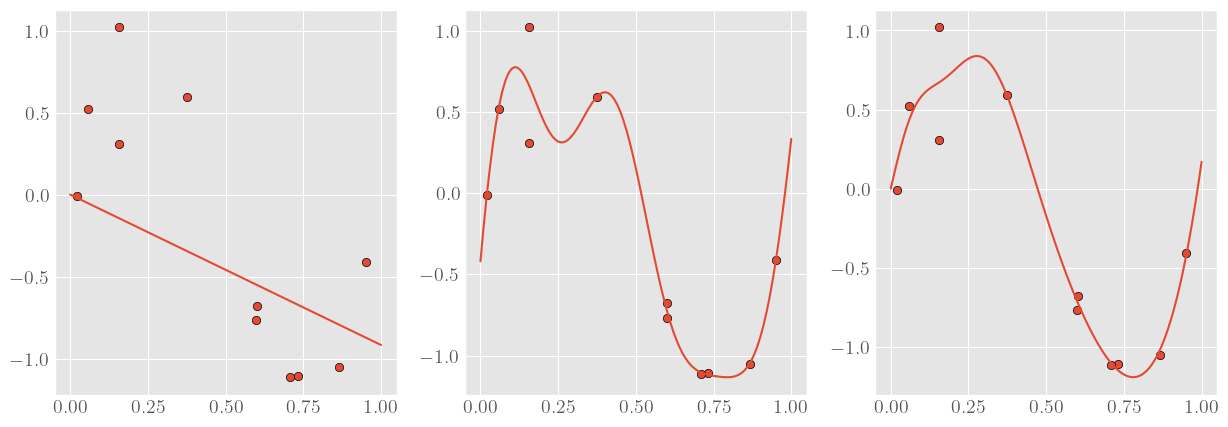

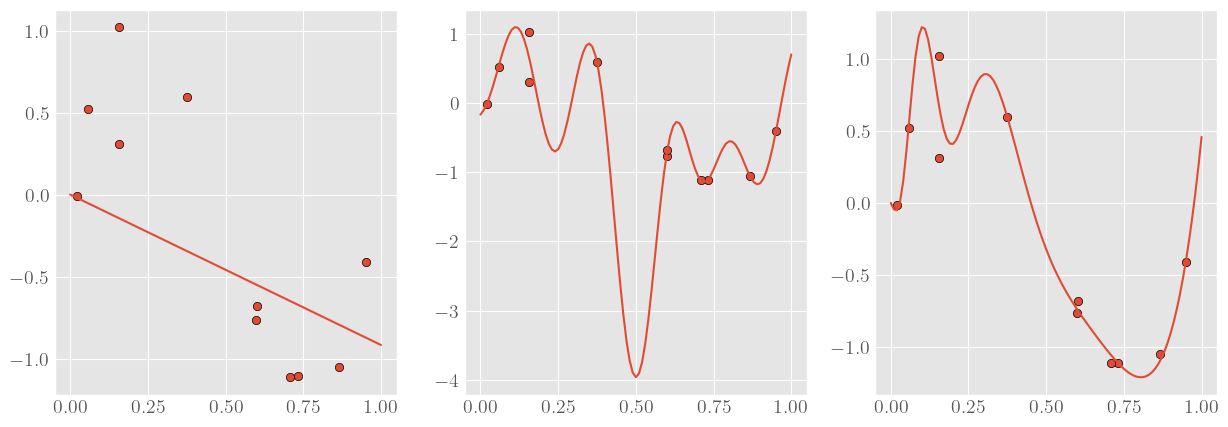

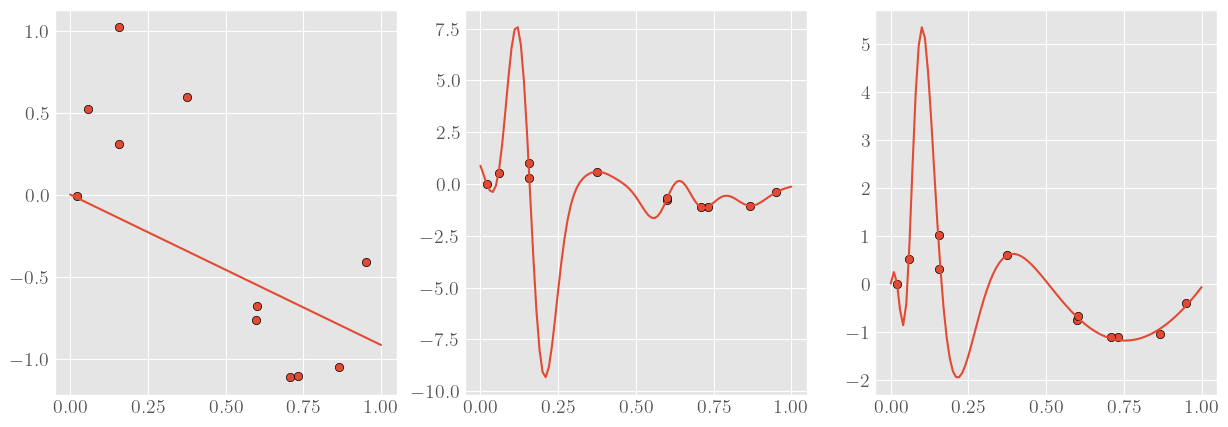

In [ ]:
axis = np.linspace(0, 1, 101)

for i in [1e-3, 1, 5, 10, 20]:
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    lin = LinearRegression(kernel_func=LinearKernel())
    lin.fit(X, y)
    plt.scatter(X, y)
    plt.plot(axis, [lin.predict(x) for x in axis])

    plt.subplot(132)
    lin = LinearRegression(kernel_func=GaussianKernel(i))
    lin.fit(X, y)
    plt.scatter(X, y)
    plt.plot(axis, [lin.predict(x) for x in axis])

    plt.subplot(133)
    lin = LinearRegression(kernel_func=SigmoidalKernel(i))
    lin.fit(X, y)
    plt.scatter(X, y)
    plt.plot(axis, [lin.predict(x) for x in axis])

    plt.show()